In [52]:
# IMPORTING LIBRARIES :
import pandas as pd
import numpy as np
import random
import os
import cv2
import glob
import shutil
import keras
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
  



In [30]:
# MANUALLY RESIZING THE IMAGE SIZES FOR THE OUTPUT
i_wd=150
i_ht=150

In [31]:
# BUILDING CNN MODEL LAYERS
model = Sequential()
#FIRST CONV+RELU LAYER
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(i_wd,i_ht,3)))
model.add(MaxPooling2D((2, 2)))
#SECOND CONV+RELU LAYER
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(i_wd,i_ht,3)))
model.add(MaxPooling2D((2, 2)))
#THIRD CONV+RELU LAYER
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(i_wd,i_ht,3)))
model.add(MaxPooling2D((2, 2)))
#FULLY CONNECTED LAYER
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

In [32]:
#COMPILING THE MODEL
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])

In [33]:
#DATA AUGMENTATION
train_data_gen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,zoom_range=0.2)
valid_data_gen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,zoom_range=0.2)

In [38]:
train_gen=train_data_gen.flow_from_directory(directory ='C:/Users/prince/Downloads/dogs-vs-cats/train',target_size=(150, 150),class_mode="binary",batch_size=32,shuffle=True)

Found 25000 images belonging to 2 classes.


In [39]:
print(train_gen.class_indices)

{'cat': 0, 'dog': 1}


In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 20736)            

In [40]:
#FITTING , GENERATING ACCURACY AND LOSS
m=model.fit_generator(train_gen,steps_per_epoch=250,
                         
                         
                        epochs = 10)


Epoch 1/10
250/250 [==============================] - 268s 1s/step - loss: 0.7241 - accuracy: 0.5509
Epoch 2/10
250/250 [==============================] - 373s 1s/step - loss: 0.6455 - accuracy: 0.6232
Epoch 3/10
250/250 [==============================] - 228s 912ms/step - loss: 0.5747 - accuracy: 0.6950
Epoch 4/10
250/250 [==============================] - 175s 699ms/step - loss: 0.5474 - accuracy: 0.7247
Epoch 5/10
250/250 [==============================] - 170s 678ms/step - loss: 0.5025 - accuracy: 0.7529
Epoch 6/10
250/250 [==============================] - 169s 675ms/step - loss: 0.4898 - accuracy: 0.7671
Epoch 7/10
250/250 [==============================] - 175s 698ms/step - loss: 0.4320 - accuracy: 0.7993
Epoch 8/10
250/250 [==============================] - 169s 676ms/step - loss: 0.4254 - accuracy: 0.8044
Epoch 9/10
250/250 [==============================] - 167s 668ms/step - loss: 0.4099 - accuracy: 0.8168
Epoch 10/10
250/250 [==============================] - 162s 650ms/step

In [48]:
from keras.preprocessing.image import array_to_img , img_to_array , load_img

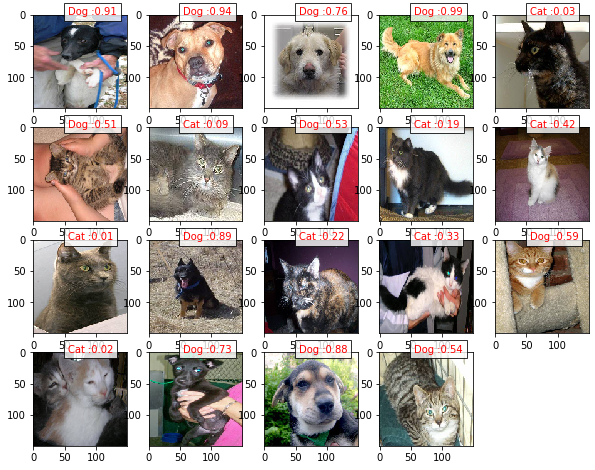

In [49]:
# PREDICTIONS
fig=plt.figure(figsize=(10, 10))
columns = 5
rows = 5
for i in range(1,20):
    img = load_img(r'C:/Users/prince/Desktop/dogs-vs-cats/test1/test1/'+str(i)+'.jpg',target_size=(150,150,3))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    img= img_to_array(img)
    img = img/255
    img = np.expand_dims(img, axis=0)
    prediction=model.predict(img)
    if prediction>0.5:
        value ='Dog :%1.2f'%(prediction[0,0])
        plt.text(55, 0,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    else:
        value ='Cat :%1.2f'%(prediction[0,0])
        plt.text(55, 0,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))